# Part II - Airline Delay Analysis
## by Layan Alfawzan

### Dataset

The dataset used in this project is the **Reporting Carrier On-Time Performance Data**, which contains flight-level statistics including information about delays, cancellations, and their causes for U.S. airlines. The subset I used includes \~120,000 records after filtering.

#### Data Source:

The dataset was retrieved from the U.S. Department of Transportation’s [Bureau of Transportation Statistics](https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp).



#### Data Wrangling Summary:

* Removed cancelled and diverted flights as they do not report arrival delay.
* Handled missing values by excluding rows where critical delay information was unavailable.
* Focused on operational flights only.
* Selected relevant columns related to arrival delay and its contributing causes.

---

### Summary of Findings

Through exploratory analysis, several interesting patterns and relationships were found:

* **Arrival delays (`arr_delay`) are right-skewed** with a long tail, indicating the presence of a few extreme delay cases.
* **Carrier and late aircraft delays** are the most correlated causes of arrival delays.
* **Some carriers have consistently higher delay times** than others, suggesting differences in efficiency or congestion.
* **Security delays are rare** and have minimal impact on total delays.
* **Delays vary across months**, with some seasonal trends visible.
* **Higher flight volume** doesn’t always mean worse performance.

---

### Key Insights for Presentation

The following insights will be the focus of the presentation:

1. **Carrier and Late Aircraft Delays as Key Drivers**
   Arrival delays are strongly associated with late aircraft and carrier-originated delays, which could reflect systemic scheduling or logistical issues.

2. **Carrier Performance Comparison**
   Significant differences in delay behavior among carriers provide an opportunity for benchmarking and identifying best practices.

---

### Investigation Overview

The goal of this analysis is to understand the **main causes behind airline arrival delays** and how they vary across **carriers, months, and delay categories**. This understanding can help stakeholders—like travelers, airline operators, and policymakers—improve performance and passenger satisfaction.

---

### Dataset Overview

The dataset includes the following:

* Time features: Year and Month.
* Airline details: `carrier`, `carrier_name`.
* Airport info: `airport`, `airport_name`.
* Delay stats: Total delays, categorized by cause.
* Flight stats: Number of flights, cancellations, diversions.

Filtered to exclude flights that were **cancelled or diverted**, ensuring that the dataset reflects only **operational flights**.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('Airline_Delay_Cause.csv')

## **Distribution of Arrival Delays**


> This histogram shows the overall distribution of arrival delays. Most flights arrive on time or slightly early, but a long tail to the right indicates a number of extreme delays.



Text(0.5, 0, 'Arrival Delay (minutes)')

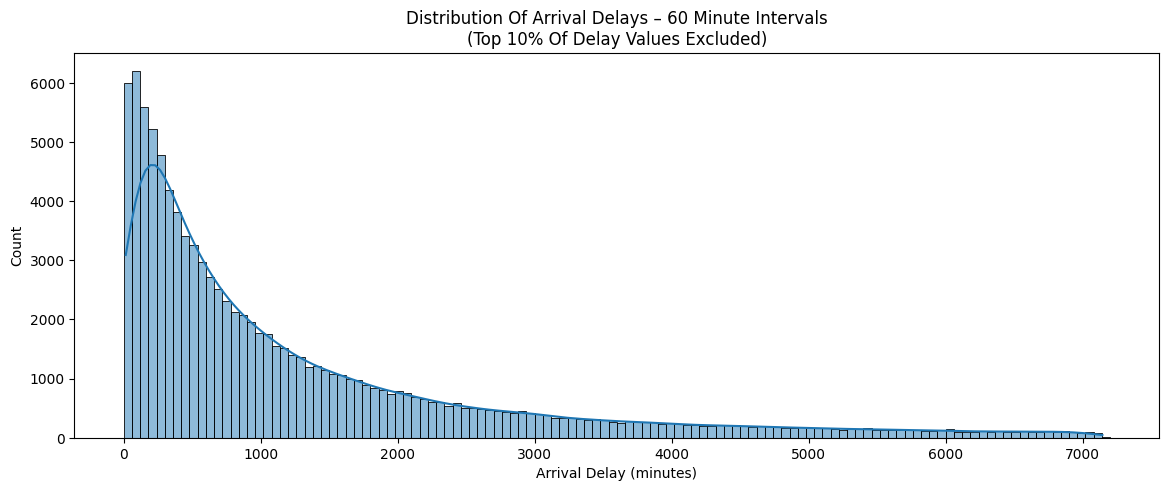

In [3]:
bsize = 60
bins = np.arange((df['arr_delay'].min()//bsize)*bsize, df['arr_delay'].max() + bsize, bsize)


bins = np.arange((df['arr_delay'].min()//bsize)*bsize, df['arr_delay'].quantile(0.90) + bsize, bsize)

plt.figure(figsize=(14,5))
sb.histplot(data=df.query('arr_delay > 0 and arr_delay < @df.arr_delay.quantile(0.90)'), 
            x='arr_delay', bins=bins, kde=True)
plt.title('Distribution of Arrival Delays – 60 minute intervals\n(top 10% of delay values excluded)'.title())
plt.xlabel('Arrival Delay (minutes)')

## **Arrival Delay by Carrier**

> This boxplot compares the distribution of arrival delays across different carriers. The red dashed line represents the overall mean.

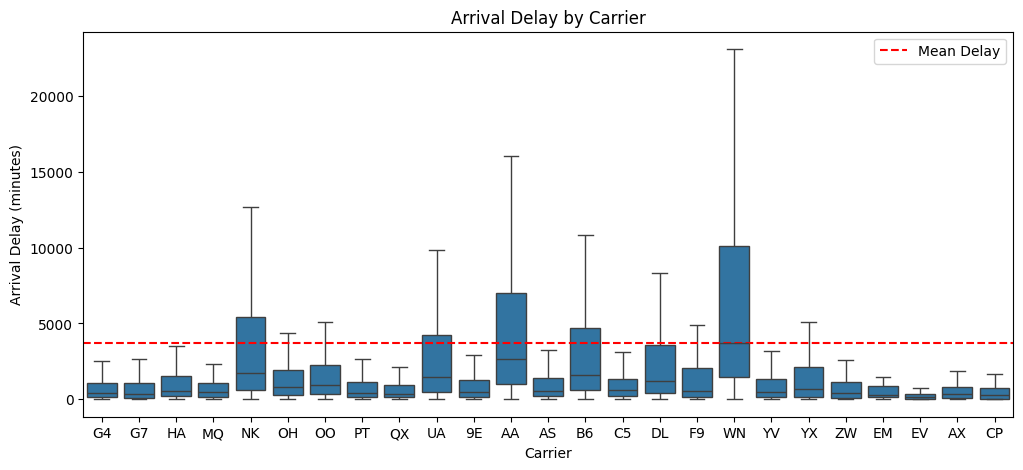

In [4]:
plt.figure(figsize=(12,5))
sb.boxplot(data=df, x='carrier', y='arr_delay', showfliers=False)
plt.axhline(df['arr_delay'].mean(), color='red', linestyle='--', label='Mean Delay')
plt.title('Arrival Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay (minutes)')
plt.legend()

## **Correlation Between Delay Causes and Arrival Delay**




>The heatmap below visualizes how delay types relate to overall arrival delay. The most strongly correlated causes are `late_aircraft_delay` and `carrier_delay`.

Text(0.5, 1.0, 'Correlation Between Delay Variables')

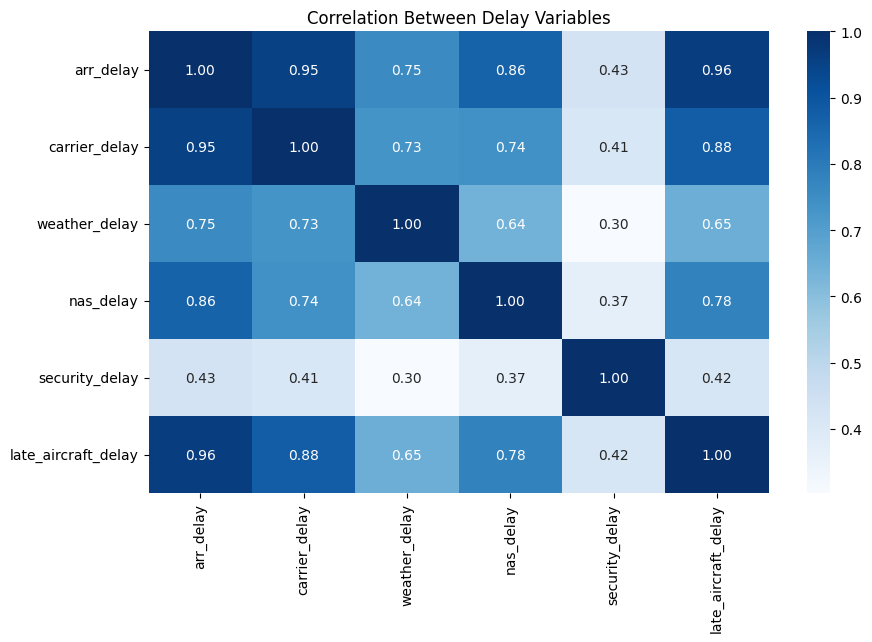

In [5]:
plt.figure(figsize=(10,6))
corr = df[['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].corr()
sb.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Between Delay Variables')

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt